
 CUSTOMER DATA ANALYSIS DASHBOARD
---------------------------------------------------
1  Total Customers by Gender & Account Type
2  High Income Customers (> threshold)
3  Customers by Age Group
4  Top 5 Customer Locations
5  Most Popular Account Type
---------------------------------------------------


 Enter your choice (1-5):  4



 Executing procedure: top_5_locations

 Top 5 Customer Locations
----------------------------
     city  total_customers
Bangalore              673
  Kolkata              653
    Delhi              644
Ahmedabad              636
  Chennai              618


C:\Users\dines\AppData\Local\Temp\ipykernel_20948\2585903057.py:33: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():
C:\Users\dines\AppData\Local\Temp\ipykernel_20948\2585903057.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='city', y='total_customers', palette='crest')


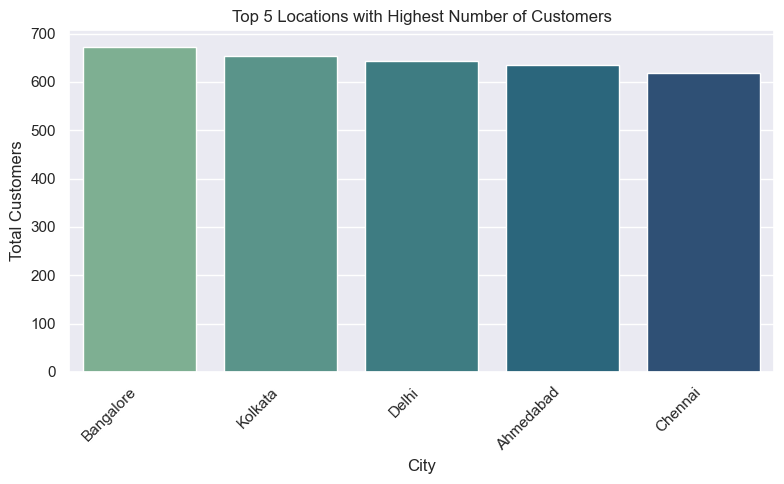

In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mysql.connector import Error

# ---------------------------------------------------------
# Database Configuration
# ---------------------------------------------------------
db_config = {
    "host": "localhost",
    "user": "root",
    "password": "14032002kD@",
    "database": "Banking"
}

# ---------------------------------------------------------
# Generic Function to Execute Stored Procedure
# ---------------------------------------------------------
def run_stored_procedure(proc_name, params=None):
    """Runs a stored procedure and returns a DataFrame."""
    connection = None
    try:
        connection = mysql.connector.connect(**db_config)
        cursor = connection.cursor()

        print(f"\n Executing procedure: {proc_name}")
        if params:
            cursor.callproc(proc_name, params)
        else:
            cursor.callproc(proc_name)

        for result in cursor.stored_results():
            rows = result.fetchall()
            columns = [col[0] for col in result.description]
            return pd.DataFrame(rows, columns=columns)

    except Error as e:
        print(f" Error executing {proc_name}: {e}")
        return None

    finally:
        if 'cursor' in locals(): cursor.close()
        if connection and connection.is_connected(): connection.close()

# ---------------------------------------------------------
# Table Display Helper
# ---------------------------------------------------------
def show_table(df, title=None):
    if title:
        print(f"\n {title}\n" + "-" * (len(title) + 4))

    if df is None or df.empty:
        print(" No rows to display.")
        return

    total = len(df)
    if total <= 10:
        print(df.to_string(index=False))
    else:
        print("Showing first 5 and last 5 rows:\n")
        print(df.head(5).to_string(index=False))
        print("\n...\n")
        print(df.tail(5).to_string(index=False))
        print(f"\n Total rows: {total}")

# ---------------------------------------------------------
# Visualization Functions
# ---------------------------------------------------------
def visualize_total_customers(df, acc_type):
    show_table(df, f"Total Customers by Gender & Account Type ({acc_type if acc_type else 'All'})")
    plt.figure(figsize=(8,5))
    sns.barplot(data=df, x='gender', y='total_customers', hue='account_type', palette='Set2')
    plt.title(f'Total Customers by Gender & Account Type ({acc_type if acc_type else "All"})')
    plt.xlabel("Gender"); plt.ylabel("Total Customers")
    plt.tight_layout(); plt.show()

def visualize_high_income(df, threshold):
    show_table(df, f"Customers with Income > ₹{threshold:,}")
    plt.figure(figsize=(9,5))
    sns.barplot(data=df.head(10), x='full_name', y='income', palette='viridis')
    plt.title(f'Top Customers with Income > ₹{threshold:,}')
    plt.xlabel("Customer Name"); plt.ylabel("Income (₹)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout(); plt.show()

def visualize_age_group(df):
    show_table(df, "Customers by Age Group")
    plt.figure(figsize=(8,5))
    sns.barplot(data=df, x='age_group', y='total_customers', palette='coolwarm')
    plt.title('Customers by Age Group')
    plt.xlabel("Age Group"); plt.ylabel("Total Customers")
    plt.tight_layout(); plt.show()

def visualize_top_locations(df):
    show_table(df, "Top 5 Customer Locations")
    plt.figure(figsize=(8,5))
    sns.barplot(data=df, x='city', y='total_customers', palette='crest')
    plt.title('Top 5 Locations with Highest Number of Customers')
    plt.xlabel("City"); plt.ylabel("Total Customers")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout(); plt.show()

def visualize_popular_account(df):
    show_table(df, "Most Popular Account Type")
    plt.figure(figsize=(6,5))
    sns.barplot(data=df, x='account_type', y='total_customers', palette='pastel')
    plt.title('Most Popular Account Type')
    plt.xlabel("Account Type"); plt.ylabel("Total Customers")
    plt.tight_layout(); plt.show()

# ---------------------------------------------------------
# Main Menu for User Interaction
# ---------------------------------------------------------
def main():
    print("\n CUSTOMER DATA ANALYSIS DASHBOARD")
    print("---------------------------------------------------")
    print("1  Total Customers by Gender & Account Type")
    print("2  High Income Customers (> threshold)")
    print("3  Customers by Age Group")
    print("4  Top 5 Customer Locations")
    print("5  Most Popular Account Type")
    print("---------------------------------------------------")

    choice = input(" Enter your choice (1-5): ").strip()

    if choice == '1':
        acc_type = input("Enter account type (Current, Savings, Fixed Deposit, Salary, or leave blank for all): ").title().strip() or None
        args = (acc_type, 0)
        df = run_stored_procedure('total_customers_by_gender_account', args)
        visualize_total_customers(df, acc_type)

    elif choice == '2':
        try:
            threshold = int(input("Enter income threshold (e.g., 100000): "))
            args = (threshold,)
            df = run_stored_procedure('high_income_customers', args)
            visualize_high_income(df, threshold)
        except:
            print(" Please enter a valid number.")

    elif choice == '3':
        df = run_stored_procedure('customers_by_age_group')
        visualize_age_group(df)

    elif choice == '4':
        df = run_stored_procedure('top_5_locations')
        visualize_top_locations(df)

    elif choice == '5':
        df = run_stored_procedure('most_popular_account_type')
        visualize_popular_account(df)

    else:
        print(" Invalid choice. Please enter 1–5.")

# ---------------------------------------------------------
# Run Program
# ---------------------------------------------------------
if __name__ == "__main__":
    sns.set_theme()
    main()
